# Setting Up Necessary Things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
! pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.6 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# %cd /content/drive/MyDrive/MasterCourseML/week-10 - Building Neural Networks with PyTorch/Lecture 44 - Income Range Classification with fastai and Learning Rate Finder
%cd /content/drive/MyDrive/MasterCourseML/week-10

/content/drive/MyDrive/MasterCourseML/week-10


In [8]:
from fastai.tabular.all import *

# Get Data

In [12]:
!gdown 1QXTCcNhRjcPiyyWoYwkxHF5KnVgsCSJT

Downloading...
From: https://drive.google.com/uc?id=1QXTCcNhRjcPiyyWoYwkxHF5KnVgsCSJT
To: /content/drive/MyDrive/MasterCourseML/week-10/adult.csv
100% 5.33M/5.33M [00:00<00:00, 26.7MB/s]


In [13]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
def add_features(df):
  df['log-capital-gain'] = np.log(df['capital-gain'] + 1)
  df['log-capital-loss'] = np.log(df['capital-loss'] + 1)
  return

add_features(df)

In [15]:
splits = RandomSplitter(seed=42)(df)

In [16]:
doc(RandomSplitter)

RandomSplitter(valid_pct=0.2, seed=None)
Create function that splits `items` between train/val with `valid_pct` randomly.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [17]:
dblock = TabularPandas(
    df,
    splits = splits, # data splits
    procs = [Categorify, FillMissing, Normalize], # data preprocessing
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], # categorical attribute column names
    cont_names = ['age', 'fnlwgt', 'educational-num', 'log-capital-gain', 'log-capital-loss', 'hours-per-week'], # continuous attribute column names
    y_names = "income", #Target column name
    y_block = CategoryBlock() # Categorify
)

In [18]:
dls = dblock.dataloaders()

# Train the model

In [19]:
model = tabular_learner(dls, metrics=accuracy, layers=[10, 10, 10])         #given 3 hidden layers and connected automatically. Not to need write full code!! In middle ReLu activation and lastly sigmoid activation applied.

### Learning Rate Finder

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(slide=0.10000000149011612, valley=0.0063095735386013985)

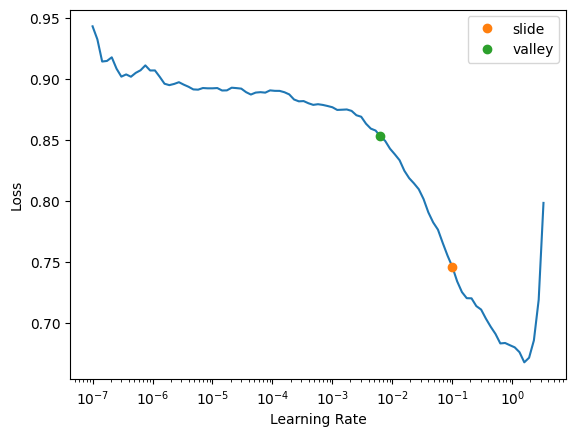

In [20]:
model.lr_find(suggest_funcs=(slide, valley))      #good learning be between slide and valley

In [21]:
model.fit(15,lr=0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.343594,0.321655,0.849406,00:07
1,0.327599,0.313455,0.855753,00:06
2,0.335552,0.319781,0.854013,00:07
3,0.326536,0.316215,0.856368,00:06
4,0.319860,0.318596,0.853604,00:07
5,0.312172,0.317184,0.853706,00:06
6,0.312708,0.323519,0.847052,00:07
7,0.321784,0.320595,0.851454,00:06
8,0.322307,0.314545,0.853399,00:07
9,0.321852,0.308262,0.856470,00:06
